In [1]:
! gdown 16NJVYywgrFTAgjR7ug8nlLsJRgODk_Q4

Downloading...
From: https://drive.google.com/uc?id=16NJVYywgrFTAgjR7ug8nlLsJRgODk_Q4
To: /content/town_1959.csv
100% 19.1k/19.1k [00:00<00:00, 23.7MB/s]


https://drive.google.com/file/d/16NJVYywgrFTAgjR7ug8nlLsJRgODk_Q4/view?usp=sharing

# Описательная статистика
Население в тысячах человек. 
В выборку попали населенные пункты,
которые считаются городами России в настоящее время, даже если в
1959 году они еще не считались городами.
Данные находятся в файле town_1959_2.csv

In [60]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [11]:
df = pd.read_csv('/content/town_1959.csv', encoding='windows-1251')

In [12]:
df.head()

,номер,город,население
0,1,Москва,5046.0
1,2,Санкт-Петербург,3003.0
2,3,Нижний_Новгород,941.0
3,4,Новосибирск,885.0
4,5,Самара,806.0


In [13]:
df.describe(include='all')

,номер,город,население
count,1004,1004,1004.000000
unique,1004,987,NaN
top,1,Советск,NaN
freq,1,3,NaN
mean,NaN,NaN,52.925199
std,NaN,NaN,204.885662
min,NaN,NaN,0.100000
25%,NaN,NaN,10.700000
50%,NaN,NaN,19.250000
75%,NaN,NaN,37.975000


In [16]:
df[df['город'] == 'Советск'] # советск почему-то 3 раза

,номер,город,население
302,303,Советск,31.9
615,616,Советск,14.7
775,776,Советск,10.1


In [24]:
df['город'].value_counts() # есть города, которые попадались несколько раз

Советск                   3
Киров                     2
Чехов                     2
Берёзовский               2
Зеленогорск               2
                         ..
Петровск-Забайкальский    1
Назарово                  1
Климовск                  1
Бакал                     1
Вуктыл                    1
Name: город, Length: 987, dtype: int64

In [31]:
# завернем дубликаты городов в лист
list_dupl = df['город'].value_counts() \
                        .to_frame() \
                        .query('город > 1') \
                        .reset_index()['index'] \
                        .to_list()

In [33]:
df.query('город == @list_dupl').sort_values('город')

,номер,город,население
315,316,Берёзовский,30.6
444,445,Берёзовский,21.9
96,97,Благовещенск,95.0
671,672,Благовещенск,12.9
771,772,Горнозаводск,10.1
722,723,Горнозаводск,11.3
324,325,Гурьевск,30.2
973,974,Гурьевск,2.4
799,800,Зеленогорск,9.2
683,684,Зеленогорск,12.5


Изучив население городов, нет ясной тенденции того, какое значение оставлять (максимум или минимум), где-то значения вовсе не сходятся. Поэтому принимаю решение оставить среднее

In [35]:
final_df = df.groupby('город').agg({'население': 'mean'}).reset_index()

In [38]:
final_df['население'].describe() # среднее больше медианы, скорее всего распределение скошено влево

count     987.000000
mean       53.377862
std       206.494414
min         0.100000
25%        10.750000
50%        19.400000
75%        38.550000
max      5046.000000
Name: население, dtype: float64

<AxesSubplot:xlabel='население', ylabel='Count'>

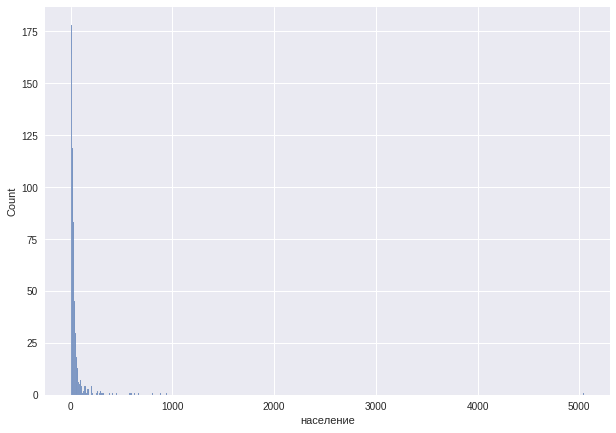

In [45]:
matplotlib.style.use('seaborn')
sns.histplot(final_df['население'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='население'>

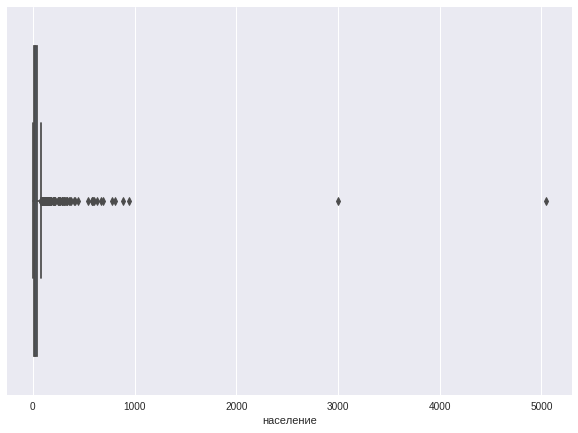

In [47]:
sns.boxplot(final_df['население'])

Есть 2 выброса - Москва и Питер. Уберем их и посмотрим на изменения статистик

In [54]:
final_df_2 = final_df.query('город != "Москва" and город != "Санкт-Петербург"')

In [57]:
final_df_2['население'].describe()

count    985.000000
mean      45.314670
std       92.131474
min        0.100000
25%       10.700000
50%       19.400000
75%       38.300000
max      941.000000
Name: население, dtype: float64

<AxesSubplot:xlabel='население', ylabel='Count'>

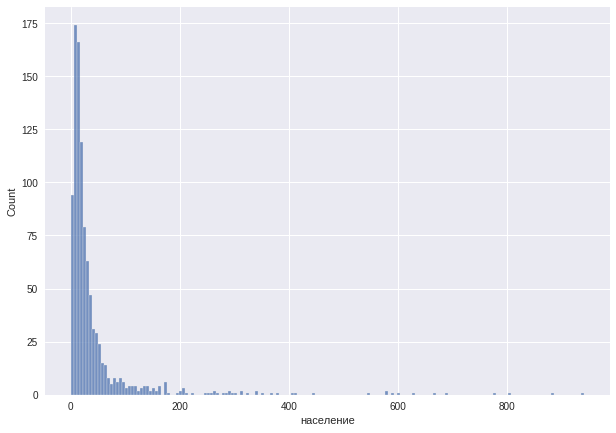

In [56]:
sns.histplot(final_df_2['население'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='население'>

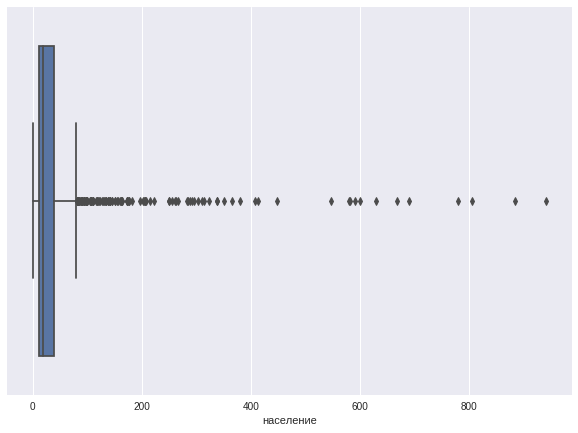

In [55]:
sns.boxplot(final_df_2['население'])

Все равно население большей части городов (75%) не превышает и 40к человек

In [62]:
# Посчитаем усеченное среднее на 2.5% с каждой стороны
stats.trim_mean(df['население'], 0.025) 

34.357651991614254

In [63]:
stats.trim_mean(final_df_2['население'], 0.025) 

34.176467449306294

<AxesSubplot:xlabel='население', ylabel='Count'>

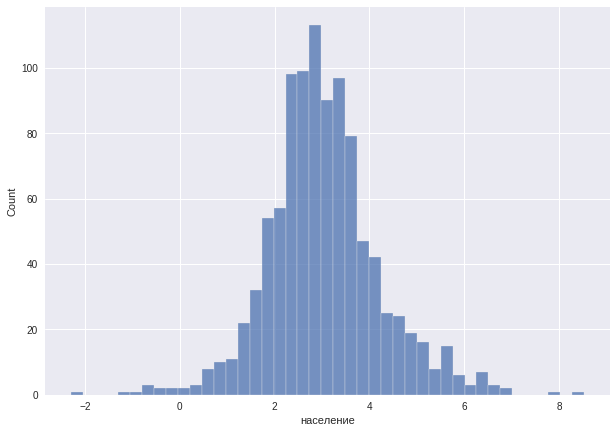

In [65]:
sns.histplot(np.log(df['население']))

<AxesSubplot:xlabel='население', ylabel='Count'>

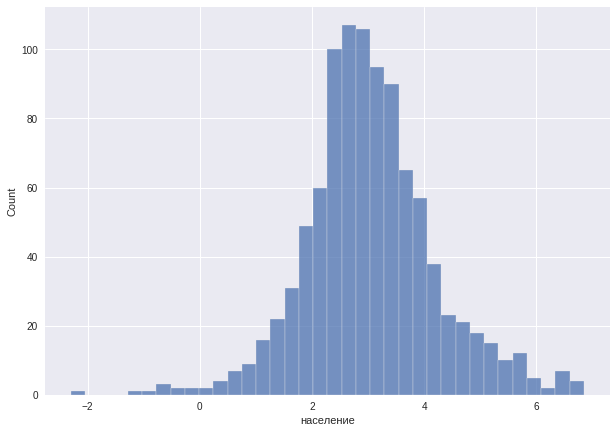

In [64]:
sns.histplot(np.log(final_df_2['население']))

In [67]:
q_1 = df['население'].quantile(q=0.025)
q_2 = df['население'].quantile(q=0.927)

In [68]:
df_tream = df.query('население > @q_1 and население < @q_2')

<AxesSubplot:xlabel='население', ylabel='Count'>

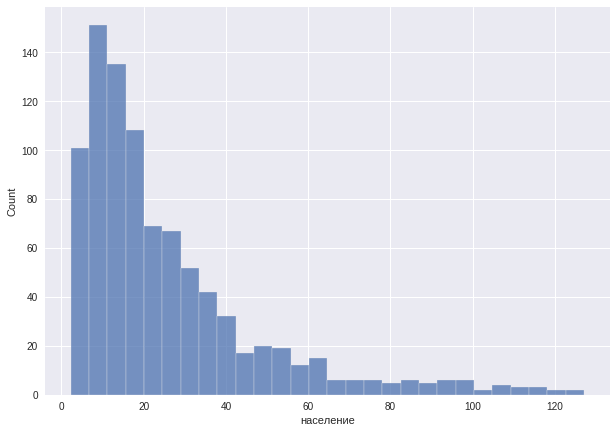

In [69]:
sns.histplot(df_tream['население'])

<AxesSubplot:xlabel='население', ylabel='Count'>

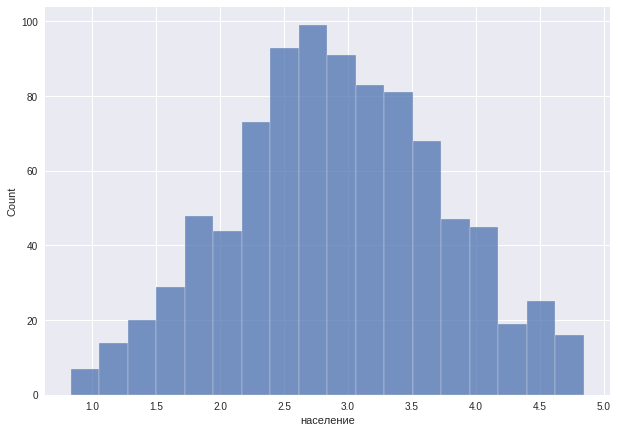

In [70]:
sns.histplot(np.log(df_tream['население']))

Оценим, является ли наше исходное (очищенное) распределение логнормальным

<AxesSubplot:xlabel='население', ylabel='Count'>

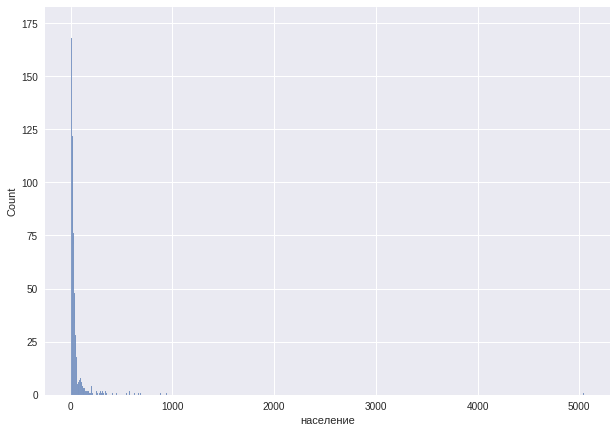

In [72]:
# посмотрим еще раз на распределение
sns.histplot(df['население'])

<AxesSubplot:xlabel='население', ylabel='Count'>

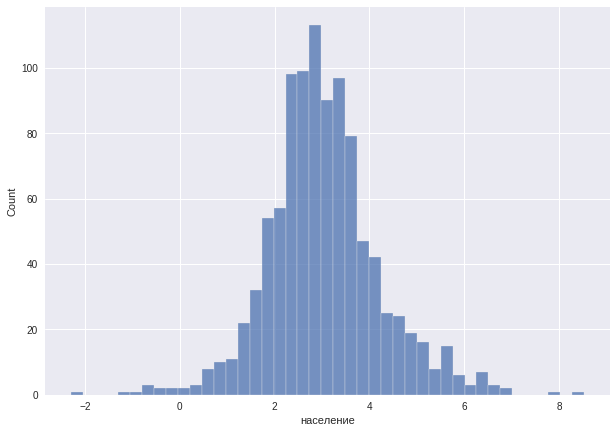

In [73]:
# посмотрим на логарифм
sns.histplot(np.log(df['население']))

In [74]:
np.log(df['население']).describe()

count    1004.000000
mean        3.038390
std         1.187850
min        -2.302585
25%         2.370244
50%         2.957508
75%         3.636922
max         8.526351
Name: население, dtype: float64

In [75]:
# 95% наблюдений нормального распределения лежат в области X+-1.96std. Проверим
q_0975 = np.log(df['население']).quantile(q=0.975)
q_0025 = np.log(df['население']).quantile(q=0.025)

In [77]:
std = np.std(np.log(df['население']))

Кстати есть разница между std нампая и пандаса. Это связано с тем, что пандас считает стандартное отклонение, тогда как нампай среднеквадратическое отклонение (то есть для генеральной совокупности)

In [80]:
print('2.5 перцентиль: ', q_0025,
      'среднее - 1.96: ', np.mean(np.log(df['население'])) - 1.96 * std, sep='\n')

2.5 перцентиль: 
0.7884573603642703
среднее - 1.96: 
0.7113639215801939


In [81]:
print('97.5 перцентиль: ', q_0975,
      'среднее + 1.96: ', np.mean(np.log(df['население'])) + 1.96 * std, sep='\n')

97.5 перцентиль: 
5.711929111366917
среднее + 1.96: 
5.365415650410083


То есть в нашем распределении больше значений лежит в обалсти 2 сигм. Проверим статистическим методом.

In [83]:
stats.normaltest(np.log(df['население']))

NormaltestResult(statistic=58.957993310804305, pvalue=1.575558091812373e-13)

Вывод: изначальное распределение не является логнормальным.